# Imports 

In [1]:
from pdb import run
from unittest import case
import emcee
import corner
import pickle
from tqdm import tqdm
import numpy as np
from qutip import *
from multiprocess import Pool
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution, basinhopping
from IPython.display import display, Math
from scipy.stats import chi2
from protocolsClass import Hamiltonian_Fitter,State
import matplotlib.pyplot as plt
 


# Measurement Data

In [2]:
ground_meas = np.array([7512786.3, 6847127.7, 6180056.7, 5510661.7, 4837199., 4156107.7, 3459061.2, 2730533.1, 1787541.6]) * 1e-3 # [kHz]
manu_ramsey_meas = np.array([-134296, -133678, -132898, -131896, -130532, -128697, -125952, -124533, -88889]) * 1e-3 # [kHz] previous

ground_meas_Nb = np.array([7560562.0 ,6894745.1 ,6227459.8 , 5557759.9 , 4883861.9 ,4202128.8 , 3504133.1, 2774604.8, 1822491.2]) * 1e-3
manu_ramsey_meas_Nb = np.array([-136547.1, -135922.4, -135196.4, -134203.1, -132831.5, -130986.4, -128470.1, -122551.2, -128756.7])* 1e-3

full_meas = np.concatenate((ground_meas_Nb,manu_ramsey_meas_Nb))

d_ground_meas = np.array([0.00014954, 0.00014637, 0.00017545, 0.00015029, 0.00012487, 0.00017868, 0.00013939, 0.00012705, 0.00021763])# [kHz]
d_manu_ramsey_meas = np.array([0.03552449, 0.03082249, 0.02343234, 0.02998403, 0.0356164,  0.01894326, 0.02569785, 0.02447841, 0.02423604])# [kHz]
d_full_meas = np.concatenate((d_ground_meas,d_manu_ramsey_meas))
A_perp_meas = 105 # [kHz] | Measured through the Raman Rabi experiment
A_simu = np.array([[-436.6,    0.,   -41.3],
                    [  -0.,  -448.4,    0. ],
                    [ -88.5,    0.,   129.8]])

exp_id = '_Old_Nb_meas'
exp_id = '_New_Nb_meas'

fitter_ground = Hamiltonian_Fitter(ground_meas_Nb,d_ground_meas,State.Ground,id = exp_id)
fitter_excited = Hamiltonian_Fitter(ground_meas_Nb + manu_ramsey_meas_Nb,d_ground_meas,State.Excited,id = exp_id)
fitter_full = Hamiltonian_Fitter(full_meas,d_full_meas,State.Full, meas_Aperp = A_perp_meas,simu_A= A_simu,id = exp_id)

# Fitted Values and Guesses

In [ ]:
guess_exicted = [ 4.43613977e+02, -2.36793936e+02, 1.49286932e+02, 1.59926691e+01, 1.11464109e-01]


guess_ground = [ 456.08283005, -237.22462143,  149.39880504,    8.29825619,  374.0529795 ] #RUN3
guess_ground = [ 460.54325122, -237.35316853,  149.44373137,    2.67503128 , 373.775732  ] #New

guess_full_old = [449.8217895516637,129.90322492463346,-237.05198836433365,-11.942209580809898,-149.3165679361477,1.5721261153027557,-0.8193213318825887,0.07781602296853966]
    
best_x =  [ 4.49821745e+02,  1.29897714e+02 ,-2.37052323e+02, -1.19458723e+01, -1.49320580e+02,  1.57442624e+00, -8.21616775e-01 , 7.88331359e-02]
median_x =  [ 4.49821749e+02,  1.29897911e+02, -2.37052291e+02, -1.19454405e+01, -1.49320418e+02,  1.57449384e+00, -8.21746234e-01,  7.89184735e-02]

# Ground

100%|██████████| 1000/1000 [00:42<00:00, 23.37it/s]


median x :  [ 4.60543246e+02 -2.37353174e+02  1.49443795e+02  2.67553596e+00
 -7.57041803e-02]
best x :  [ 4.60543244e+02 -2.37353179e+02  1.49443843e+02  2.67587443e+00
 -7.64319981e-02]


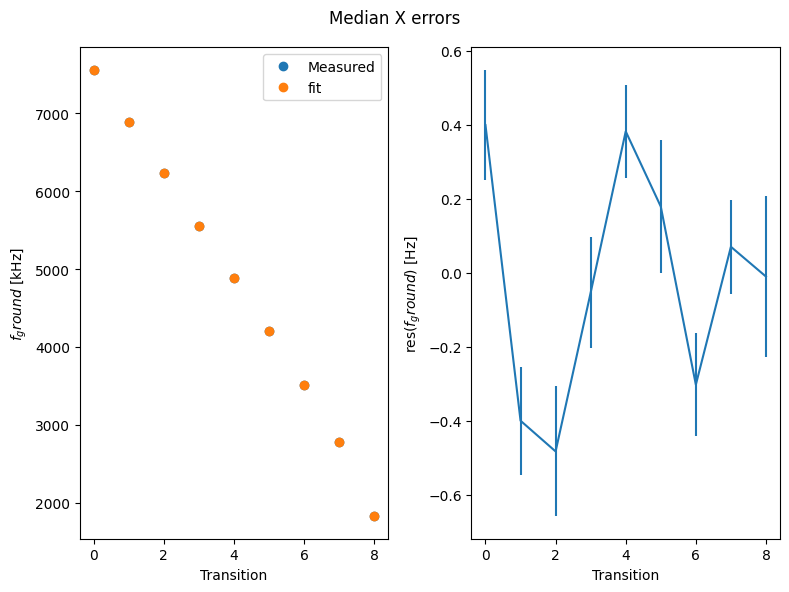

In [3]:
guess = np.array([ 4.60542304e+02, -2.37354893e+02, 1.49456996e+02, 2.76931005e+00,-2.25838221e-01])
fitter_ground.run_MCMC(guess,nsteps = 1000)

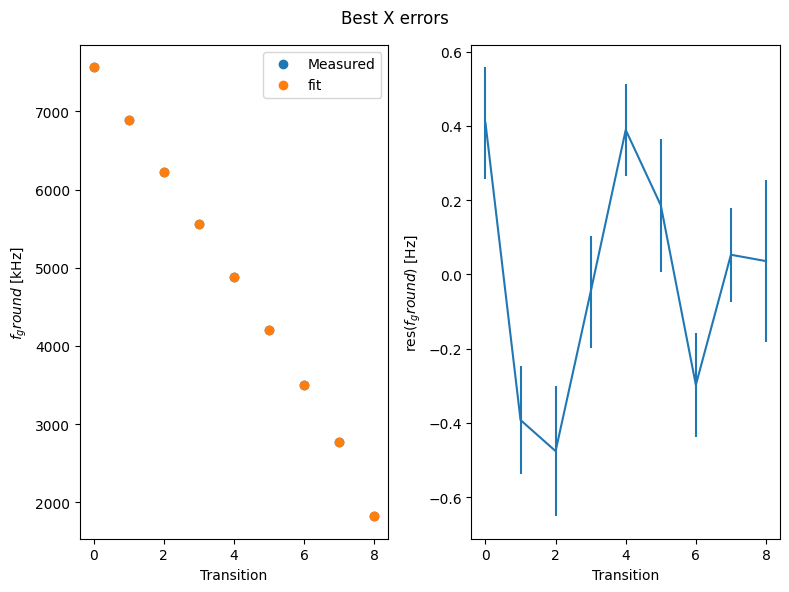

In [4]:
fitter_ground.Plot_Best()

In [5]:
fitter_ground.Save_results()

# excited

100%|██████████| 3000/3000 [02:20<00:00, 21.31it/s]


median x :  [ 4.43609547e+02 -2.36802093e+02  1.49348902e+02  1.60707556e+01
  1.39318898e-01]
best x :  [ 4.43609535e+02 -2.36802112e+02  1.49349062e+02  1.60709293e+01
  1.39371094e-01]


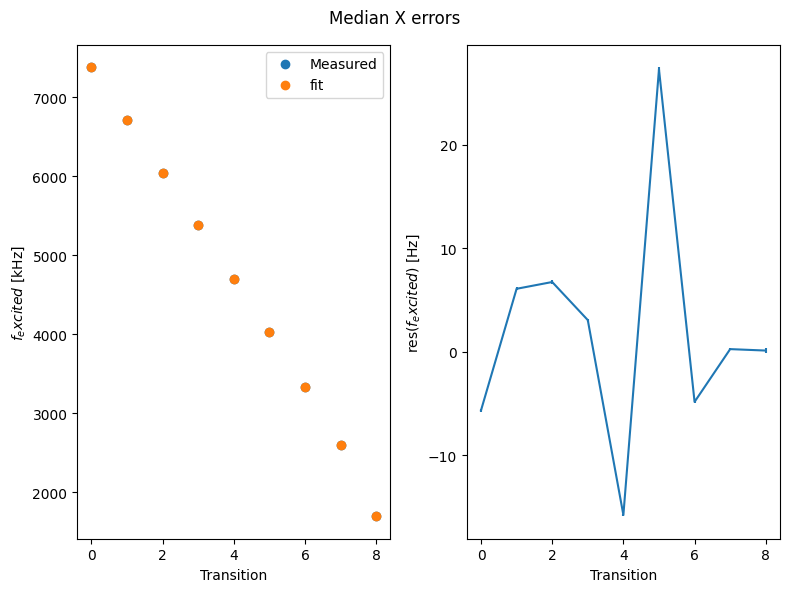

In [31]:
fitter_excited.run_MCMC(guess_exicted,nsteps=3000)

In [23]:
fitter_ground.hamiltonian([1,1,1,1,1])

Quantum object: dims=[[2, 10], [2, 10]], shape=(20, 20), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 8.64610415e+03 +0.j          1.20000000e+01 +0.j
  -2.49688102e+00 -5.45578456j  0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j        ]
 [ 1.20000000e+01 +0.j          8.64452545e+03 +0.j
   1.20000000e+01 +0.j         -3.81404876e+00 -8.33384858j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00 +0.j
   0.00000000e+00 +0.j          0.00000000e+00

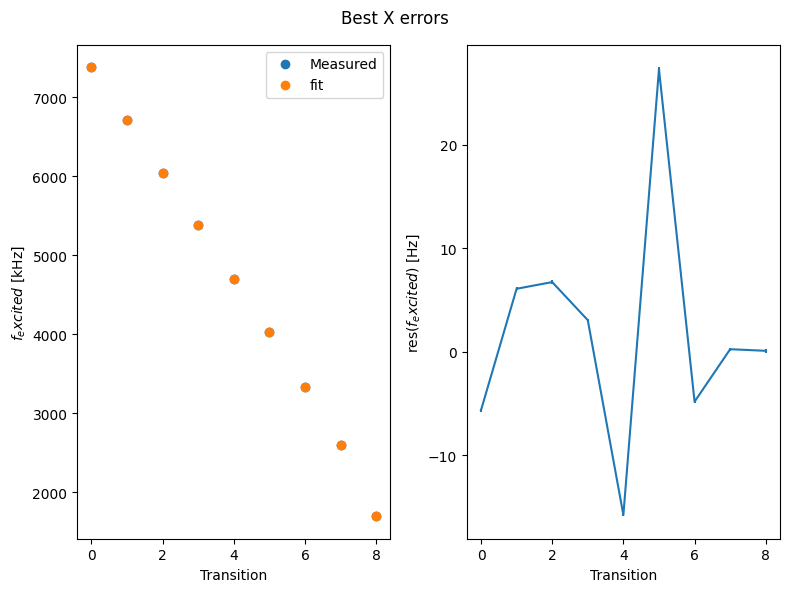

In [32]:
fitter_excited.Plot_Best()

In [33]:
fitter_excited.Save_results()

# Full

100%|██████████| 1000/1000 [01:24<00:00, 11.89it/s]


median x :  [ 4.53435467e+02  1.33773862e+02 -2.37167427e+02 -4.50198330e+00
 -1.46431846e+02  1.17220619e+00 -8.79801135e-01  2.22383729e-03]
best x :  [ 4.55282505e+02  1.26036116e+02 -2.22049359e+02 -4.33668484e+00
 -1.56331052e+02  1.05482337e+00 -7.71424247e-01  2.02600058e-03]


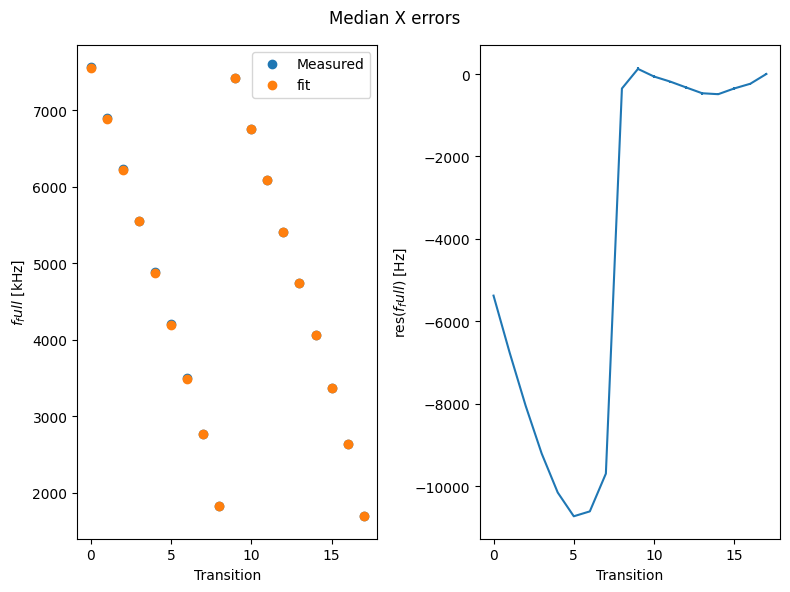

In [ ]:
best_x =  [ 4.60735120e+02 , 1.33454486e+02 ,-2.37473628e+02 ,149.5887879e+00,
 2.677151815e+00 , 1.17723572e+00 ,-8.98114801e-01,  2.22202185e-03]

[ 460.54322535 -237.35320758  149.44410449    2.67777477  373.76719059]

fitter_full.run_MCMC(best_x,nwalkers=200,nsteps = 1000,var = 0.1)

In [5]:
fitter_full.Load_results()

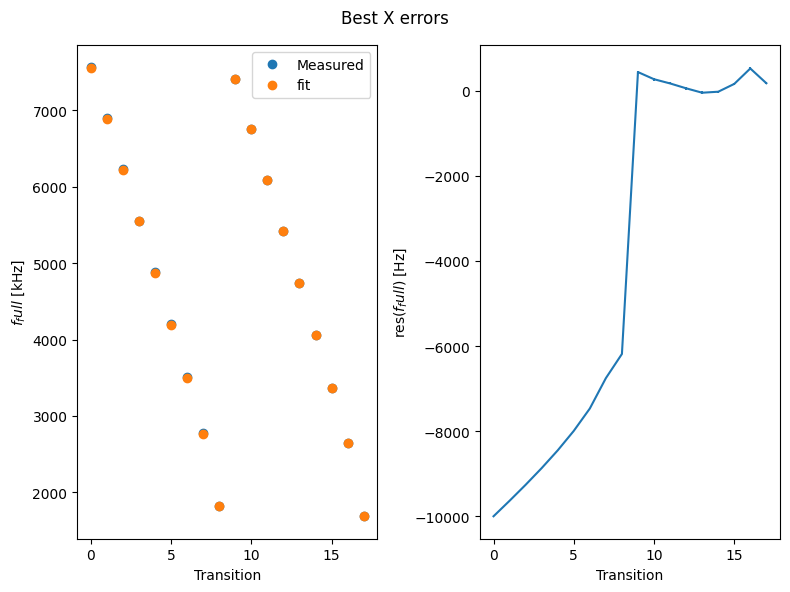

In [20]:
fitter_full.Plot_Best()

c:\Users\manipp4\Documents\Leons_stuff\Spectroscopy_Hamiltonian_fitter-\protocolsClass.py:282: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(meas_to_plot[:9], 'o', marker = 'v', label= r"$\omega^{\downarrow}_{{n(n+1)}/2\pi}$", color = 'orange')
c:\Users\manipp4\Documents\Leons_stuff\Spectroscopy_Hamiltonian_fitter-\protocolsClass.py:283: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(meas_to_plot[9:], 'o', marker = '^', label= r"$\omega^{\uparrow}_{{n(n+1)}/2\pi}$", color = 'blue')
c:\Users\manipp4\Documents\Leons_stuff\Spectroscopy_Hamiltonian_fitter-\protocolsClass.py:290: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorb

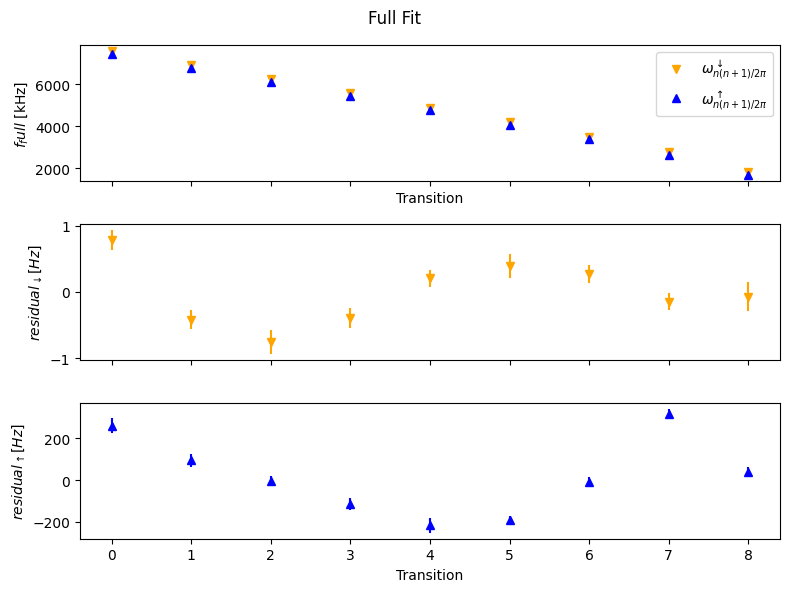

In [14]:
best_x =  [ 4.54108655e+02 , 1.33523952e+02 ,-2.37337245e+02, -1.93935565e+00,1.49453462e+02 , 6.39017283e-01 , 6.06997550e-02 , 4.70756514e-02]
best_x =[
        454.10605504695775,
        133.57244867505756,
        -237.32204916654658,
        -4.559419745650368,
        -149.44617506858702,
        1.17827308152957,
        -0.897921672884458,
        0.0022243683274747834
    ]
fitter_full.Plot_full(best_x)

In [16]:
fitter_full.Save_results()

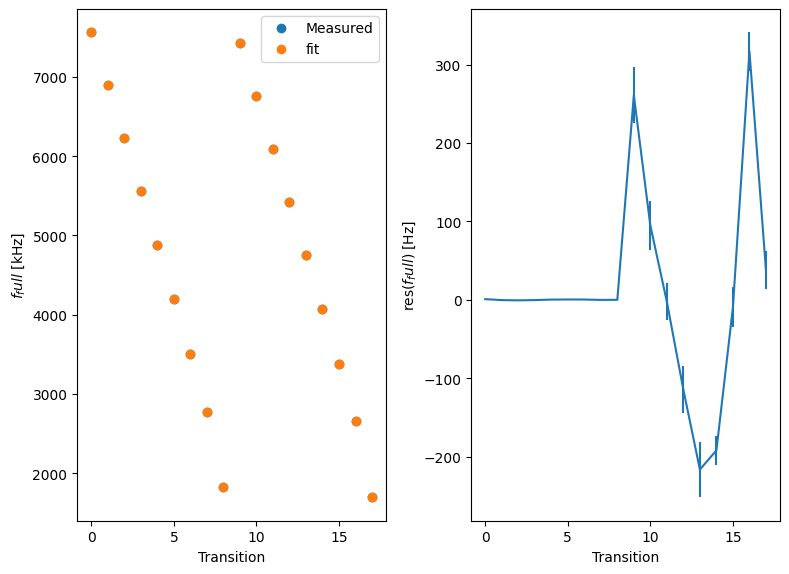

In [9]:

fitter_full.plot_levels_and_residuals_separated(best_x)


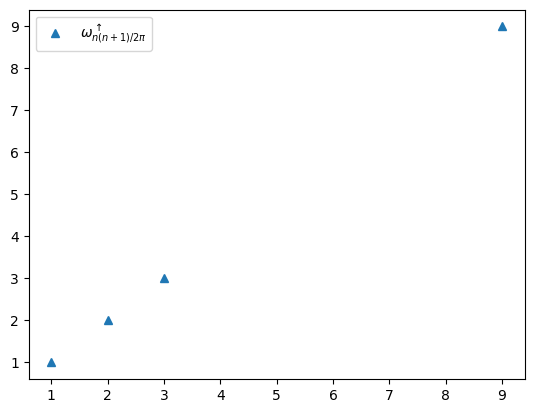

In [12]:
plt.plot([1,2,3,9], [1,2,3,9], '^', label= r"$\omega^{\uparrow}_{{n(n+1)}/2\pi}$")
plt.legend()
